## Topic 1: Pandas DataFrames for Working with Tabular Data

### Tabular Data
This is a tutorial for / demonstration of Tabular Data Structures in Python. In Python, the common tool for dealing with Tabular Data Structures is the DataFrame from the pandas Python package.

#### Loading The Libraries

In [73]:
import os                                       # operating system 
import numpy as np                              # arrays and matrix math
import pandas as pd                             # DataFrames
import matplotlib.pyplot as plt                 # plotting

#### Loading The Data

In [74]:
df = pd.read_csv("Dataset.csv")
print(df.iloc[0:5,:]) # First 5 sample columns
df.head() # view the first 5 sample columns

      X     Y  facies_threshold_0.3  porosity  permeability  \
0   565  1485                     1    0.1184         6.170   
1  2585  1185                     1    0.1566         6.275   
2  2065  2865                     2    0.1920        92.297   
3  3575  2655                     1    0.1621         9.048   
4  1835    35                     1    0.1766         7.123   

   acoustic_impedance  
0               2.009  
1               2.864  
2               3.524  
3               2.157  
4               3.979  


,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


#### Checking The Tabular Data
It is useful to review the summary statistics of our loaded DataFrame. That can be accomplished with the `describe` DataFrame member function. We transpose to switch the axes for ease of visualization.

In [75]:
#df.describe()

#changing other parameters
df.describe(percentiles=[0.1,0.9])# Adding 0.1 and 0.9 percentiles



,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,2053.400000,1876.15000,1.330000,0.149300,25.287462,3.000435
std,1113.524641,1137.58016,0.471393,0.032948,64.470135,0.592201
min,25.000000,35.00000,1.000000,0.050000,0.015820,2.009000
10%,414.000000,364.00000,1.000000,0.106100,0.262290,2.191500
50%,2160.000000,1855.00000,1.000000,0.150150,4.825500,2.964500
90%,3510.000000,3475.00000,2.000000,0.190140,56.534400,3.833600
max,3955.000000,3995.00000,2.000000,0.223200,463.641000,3.984000


#### Renaming
Renaming the facies, permeability and acoustic impedance for convenience.

In [76]:
# Renaming Feature
df = df.rename(columns={'facies_threshold_0.3': 'facies','permeability':'perm','acoustic_impedance':'ai'}) #rename columns of the dataframe 
df.head()


,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


#### Slicing Dataframes

It is straight forward to extract subsets from a `DataFrame` to make a new `DataFrame`: 
- We use `[my_DataFrame].iloc()` with indexes, integers for rows and columns.
- This is useful for cleaning up data by removing features that are no longer of interest.
- Below we make a new DataFrame, `df_subset`, with the rows 0 to 4 and columns 2 to 6 and another new DataFrame, `df_subset`.

In [77]:
df_subset = df.iloc[0:5, 2:7]# slicing colum o to 4
df_subset.head()

,facies,porosity,perm,ai
0,1,0.1184,6.170,2.009
1,1,0.1566,6.275,2.864
2,2,0.1920,92.297,3.524
3,1,0.1621,9.048,2.157
4,1,0.1766,7.123,3.979


In [78]:
# Slicing with loc
df_subset2 = df.loc[:4, ['X', 'facies', 'porosity', 'perm']] #sliced 4 columns with name having X, facies, porosity and perm
df_subset2.head(n=10)

,X,facies,porosity,perm
0,565,1,0.1184,6.170
1,2585,1,0.1566,6.275
2,2065,2,0.1920,92.297
3,3575,1,0.1621,9.048
4,1835,1,0.1766,7.123


#### Deep And Shallow Copy

**- Shallow Copy:**<br>
- A shallow copy creates a new object but does not create new copies of the nested objects within the original object. In short, if you point to the same memory, change one and both are changed.<br>

 Let's imagine you have a toy box with different toys inside, and some of those toys have smaller toys inside them. Now, imagine you want to make a copy of your toy box. Making a shallow copy is like taking a photo of your toy box. You create a new box that looks the same, but instead of getting new copies of all the toys inside, you just make a note of where each toy is.<br>
 If you change a small toy inside the copied box (like drawing on it), the same change will happen to the toy in the original box because they are connected.<br>

 **For example:**
```Python
original_box = [1, [2, 3], 4]
shallow_copy = original_box.copy()

# Now, changing a small toy (number) in the copied box affects the original box
shallow_copy[1][0] = 99
print(original_box)  # [1, [99, 3], 4]

```

**- Deep Copy:**<br>
- A deep copy creates a new object and recursively creates new copies of all the objects found in the original structure. In short,  make a new copy in memory, change one only one changes. <br>

Now imagine the toy box we created before again. Making a deep copy is like making an exact duplicate of your toy box. You not only create a new box, but you also get new copies of all the toys inside, even the smaller ones. The new toys are not connected to the old ones. <br>
If you change a small toy inside the copied box, the original box's toys stay the same because they are not linked.<br>

**For Example:**
```Python
import copy

original_box = [1, [2, 3], 4]
deep_copy = copy.deepcopy(original_box)

# Now, changing a small toy (number) in the copied box doesn't affect the original box
deep_copy[1][0] = 99
print(original_box)  # [1, [2, 3], 4]

```

In [79]:
#deep copy example
df_deep_copy = df.copy(deep=True) # deep copy of the DataFrame
df_deep_copy.loc[4, 'ai'] = 4.0# changing a value but output shows no change.
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


In [80]:
# shallow copy example
df_shallow_copy = df.copy(deep = False)# shallow copy of dataframe
df_shallow_copy.loc[4, 'ai'] = 4.0 # changing a value but output is changed now
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,4.000


#### Adding A New Feature

We will see now how to add a new feature or column in our dataframe. **We assume that the array is in the same order as the samples in the DataFrame.**<br>
**Note:** This could be an issue if any rows were removed form either before adding etc.<br>
Here we are adding feature name indicated as 'zero' in out dataframe.

In [81]:
zeros12 = np.zeros(len(df)) # making an array of zeros
df['Zero'] = zeros12 # giving it name as Zero
df.head()

,X,Y,facies,porosity,perm,ai,Zero
0,565,1485,1,0.1184,6.170,2.009,0.0
1,2585,1185,1,0.1566,6.275,2.864,0.0
2,2065,2865,2,0.1920,92.297,3.524,0.0
3,3575,2655,1,0.1621,9.048,2.157,0.0
4,1835,35,1,0.1766,7.123,4.000,0.0


#### Removing A Feature
We can also remove features from the DataFrame.
- We do this with the member function, `[my_DataFrame].drop()`
- We just have the give the column name and by indicating axis=1 we specify to drop a column.

In [82]:
df = df.drop('Zero', axis=1) # remove the zero column
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,4.000


#### Removing A Sample
We can also remove samples from the DataFrame.
- We do this with the member function, `[my_DataFrame].drop()`
- We just have the give the sample index and by indicating axis=0 we specify to drop a sample.

In [83]:
df = df.drop(3, axis=0) # dropping the sample 3
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
4,1835,35,1,0.1766,7.123,4.000
5,3375,2525,1,0.1239,1.468,2.337


#### Feature Engineering
We may want to make new features by using mathematical operators applied to existing features.
- For example, we can make a porosity feature in percentage instead of fraction, called 'porosity100'
- Or a ratio of permeability divided by porosity, called 'ratiopermpor', may be useful for subsequent calculations such as the Lorenz Coefficient.

In [84]:
df['porosity100'] = df['porosity']*100
df['ratiopermpor'] = df['perm']/df['porosity']
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,ratiopermpor
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265


##### Conditional Manipulation
We could also use conditional statements when assigning values to a new feature.
- For example, we could have a categorical porosity measure for high and low porosity, called 'porositymeasure'.

In [85]:
# making a new categorical feature called porositymeasure
df['porositymeasure'] = np.where(df['porosity'] >= 0.12, 'high', 'low')
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,ratiopermpor,porositymeasure
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243,high
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088,high
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high


##### Conditional Manipulation, More Than One Feature 
Here's an example where we use a conditional statement to assign a very low permeability value (0.0001 mD) for all porosity values below a threshold.

In [86]:
# new feature with conditional truncation
df['perm_threshold'] = np.where(df['porosity'] >= 0.12, df['perm'], 0.0001)
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,ratiopermpor,porositymeasure,perm_threshold
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243,high,6.2750
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680


#### Finding Missing Data
**What if we miss some data or add some invalid values?**<br>
- Let's assign a single porosity value to NaN, 'not a number', indicating a missing or erroneous value.
- We will then check for the number of NaN values in our DataFrame.
- Then we can search for and display the sample with the NaN porosity value.

In [87]:
#using df.loc() to access a single sample

#accessing second sample
df.loc[1, 'porosity'] = np.NaN # adding a NaN if value is missing in the sample
print('Number of null values in our DataFrame = ', str(df.isnull().sum().sum()))#isnull gives an array which sums twice i.e. sum over row and sum over column and sums all the true values for the query
nan_rows = df[df['porosity'].isnull()]# finding sample with missing valyes
print(nan_rows)

Number of null values in our DataFrame =  1
      X     Y  facies  porosity   perm     ai  porosity100  ratiopermpor  \
1  2585  1185       1       NaN  6.275  2.864        15.66     40.070243   

  porositymeasure  perm_threshold  
1            high           6.275  


#### Likewise Deletion
We can see that sample 1 has a NaN porosity value. Now we may choose to remove the sample with the NaN.
- The `dropna` DataFrame member function will remove all samples with NaN entries from the entire DataFrame.
- By visualizing the index at the left of the DataFrame preview you can confirm that sample 1 is removed (it jumps from 0 to 2).

In [88]:
df = df.dropna(how = 'any')# dropping value with any missing values i.e. NaN
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,ratiopermpor,porositymeasure,perm_threshold
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,4.000,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.9330


#### Conditional Slicing
One could extract samples into a new DataFrame with multiple criteria.
- We make a new DataFrame with all good porosity and good permeability

In [89]:
# extracting more than one condition at same time
df_extract = df.loc[(df['porosity'] > 0.12) & (df['perm'] > 10.0)]
df_extract.head()

,X,Y,facies,porosity,perm,ai,porosity100,ratiopermpor,porositymeasure,perm_threshold
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.297
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.933
7,3715,3045,2,0.1914,116.781,2.187,19.14,610.141066,high,116.781
13,545,3765,1,0.1817,14.311,3.045,18.17,78.761695,high,14.311
15,1385,2415,2,0.1774,22.578,2.711,17.74,127.271702,high,22.578


#### Making A New DataFrame
It is also simple to build a new DataFrame from a set of 1D arrays. **Note, they must have the same size and be sorted consistently.**

- We will extract porosity and perm as arrays (if you remove '.values' they are extracted as Series, an array retaining the feature name).
- We then use the pandas DataFrame command to make a new DataFrame with each 1D array and the column names specified as 'porosity' and 'permeability'.

In [90]:
por = df['porosity'].values                     # extract porosity column as vector
perm = df['perm'].values                        # extract permeability column as vector
df_new = pd.DataFrame({'porosity': por, 'permeability': perm}) # make a new DataFrame from the vectors
df_new.head()

,porosity,permeability
0,0.1184,6.170
1,0.1920,92.297
2,0.1766,7.123
3,0.1239,1.468
4,0.1790,31.933


### Plotting The Data

#### Basic Plotting
Using Panda's built in plotting functions.

##### 1. Line Plotting


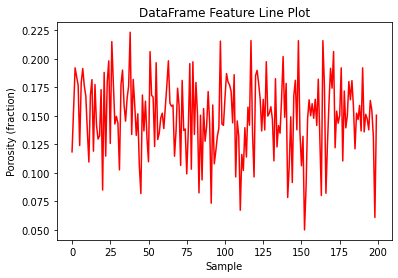

In [93]:
df['porosity'].plot(kind='line', color='red')#maing a line plot
plt.ylabel('Porosity (fraction)')
plt.xlabel('Sample'); plt.title('DataFrame Feature Line Plot');
plt.show()

##### 2. Histograms

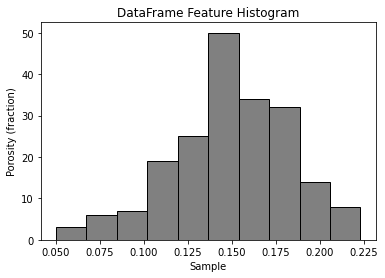

In [98]:
df['porosity'].plot(kind='hist', color='grey', edgecolor='black')  #plotting a histogram
plt.ylabel('Porosity (fraction)')
plt.xlabel('Sample'); plt.title('DataFrame Feature Histogram');
plt.show()